In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Loading csv type data

In [3]:
X = np.loadtxt('data_1000.csv', delimiter = ',')
Y = np.loadtxt('label_1000.csv', delimiter= ',').reshape(1000, 1)

X = X.T
Y = Y.T

In [4]:
print(X.shape, Y.shape)

(3072, 1000) (1, 1000)


In [5]:
print(X)

[[ 81. 207. 101. ...  62. 227. 131.]
 [ 78. 210. 104. ...  67. 230.  99.]
 [ 79. 209. 111. ...  59. 233.  38.]
 ...
 [ 77. 108.  33. ... 116.  21. 207.]
 [ 68. 117.  28. ... 109.  23. 207.]
 [ 88. 126.  22. ... 109.  22. 201.]]


# Sigmoid and initialization with zeros

In [6]:
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

In [7]:
w = np.zeros((Y.shape[0], X.shape[0]))
b = 0

# Cost Function

In [8]:
def compute_cost(w,b,x, y):
    m = x.shape[1]
    z = np.dot(w, X) + b
    a = sigmoid(z)
    cost = -(1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    dw =  (1/m)*np.dot((a-y), X.T)
    db = (1/m)*np.sum((a - y), axis = 1, keepdims = True)
    
    return cost, dw, db

# Gradient

In [9]:
def grad(w, b, x, y, learning_rate, iterations):

    cost_list = []
    for i in range(iterations + 1):
        cost, dw, db = compute_cost(w, b, x, y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        cost_list.append(cost)
        
        if i%(iterations/10) == 0 :
            print("Cost after ", i ,"iterations is ", cost)
    
    return w, b, cost_list

# Model implementation

In [28]:
iter = 50000
starttime = time.time()
W, B, Cost_listt = grad(w, b, X, Y, learning_rate = 0.0000001, iterations = iter)
endtime = time.time()
times = endtime - starttime
mintimes = times/60
if times > 200:
    print("\nTime taken is", mintimes, "minutes")
else :
    print("\nTime taken is", times, "seconds")

Cost after  0 iterations is  0.6931471805599454
Cost after  5000 iterations is  0.4479380424900573
Cost after  10000 iterations is  0.40375031708326525
Cost after  15000 iterations is  0.3745075060178065
Cost after  20000 iterations is  0.35207901724545626
Cost after  25000 iterations is  0.33371139174371606
Cost after  30000 iterations is  0.3181050826929489
Cost after  35000 iterations is  0.304526302031784
Cost after  40000 iterations is  0.2925117112228759
Cost after  45000 iterations is  0.28174574874729297
Cost after  50000 iterations is  0.27200173537789557

Time taken is 6.033932912349701 minutes


# Ploting Cost function v/s Iterations

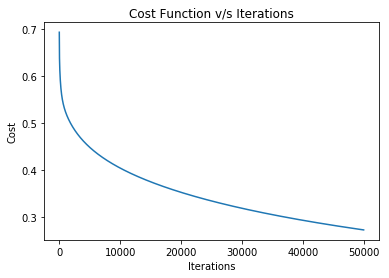

In [29]:
t = np.arange(0, iter+1)
plt.plot(t, Cost_listt)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function v/s Iterations')
plt.show()

# Accuracy

In [30]:
z_prob = np.dot(W, X) + B
a_pred = sigmoid(z_prob)
y_pred = a_pred > 0.5
y_pred = np.array(y_pred)

In [38]:
print("Train Accuracy:",np.mean(y_pred == Y)*100, "%")

Train Accuracy: 91.2 %


# Test Data

In [32]:
X_t = np.loadtxt('test_data.csv', delimiter = ',').T
Y_t = np.loadtxt('test_label.csv', delimiter = ',')     # shape = (300,)

In [34]:
a_pred_t = np.dot(W, X_t) + B
y_pred_t = a_pred_t > 0.5

In [46]:
accuracy = np.mean( y_pred_t == Y_t)*100
print("Our Test accuracy is %.2f" %accuracy, "% - futher training the model wont increase test accuracy much")

y_pred_test = []
for i in range(y_pred_t.shape[1]):
    if a_pred_t[:, i] > 0.5:
        y_pred_test.append('dog')
    else:
        y_pred_test.append('bird')
y_pred_test = np.array(y_pred_test).reshape(a_pred_t.shape[1],1)
#print(y_pred_test)         #This will print the predicted labels for test set

Our Test accuracy is 72.33 % - futher training the model wont increase test accuracy much
